# Problem 1 - Open reading frames and nested loops.

#### Note: do not use any bio-specific packages for this part. 

### Part 1: 
Write a piece of code that creates a random DNA sequence of length
N (i.e. consisting of the letters ATGC) where we will start with N=500 base pairs (b.p.). Store the output in a variable called rand_seq. Hint: the random number generator functions within numpy may be useful. 

In [12]:
import numpy as np

In [76]:
N = 500; # define sequence length
dict_DNA = {1 : "A", 2 : "T", 3 : "G", 4 : "C"}
rand_nums = np.random.randint(1, 5, size = N)
rand_seq = ""
for num in rand_nums:
    rand_seq = rand_seq + dict_DNA[num]
print(rand_seq)

GGAACCAAATGATCTTTCCTGGGAAGCTGGTTAAGCATGGACTCGCTGAGGCACAGTCCTCAAATGACATTGCTACCCGCCTCTACATTACCACGTCCCAGTCTTACGCAACAACTATGAGTGCCAGGCTCTAGGTTTTCCCGGCTTGCCGAAATACAGTGTAGTTTGGTCCAAAGACTATCTTCTACTACCGGGGGAAGGTAACTCTGCTTACATCTCGATCTAAGGATGAGTGGATATGACGTTAAGGGCCCAGGACAGTGTTCCGACGACAATTCCATTCGGACGCGGGCGGGCCATCATCCTACCCTATCCAAGCGGTGTAGGTTTGCCAGAGGAAAAGCCACGCGGCCCAAGCGTACTCATTCGAGGCGACGGTCGGGATACTCAGAAGCCTTACTACTTTCTGAAATAACCAGACAAATGGGAAGAGAAGCTACTTACGGGGCCTGTGGGAGGCAACGGCTATGGTATGGGCTGGTACAATTAGACTAGCTAGA


### Part 2 
Open reading frames (ORFs) are pieces of DNA that can be
transcribed and translated. They start with a start codon (ATG) and end with a
stop codon (TAA, TGA, or TAG). Write a piece of code that finds the longest ORF 
in your seqeunce rand_seq.

In [39]:
orf = ""
for i in range(len(rand_seq)):
    if rand_seq[i: i + 3] == "ATG":
        new_str = rand_seq[i:]
        min_index = min([new_str.find("TAA"), new_str.find("TGA"), new_str.find("TAG")])
        if max([new_str.find("TAA"), new_str.find("TGA"), new_str.find("TAG")]) != -1:
            new_orf = rand_seq[i: i + min_index + 3]
            if len(orf) < len(new_orf):
                orf = new_orf
print(orf)

ATGTTATCATCTGTTATTTTACACGGACAGTTATTGCTGTGTCACGCCGTTTCGACTCATGCAAAGCAGGCACGGCATTGGCTCTTGA


### Part 3: 
Copy your code in parts 1 and 2 but place it inside a loop that
runs 1000 times. Use this to determine the probability 
that an sequence of length 500 has an ORF of greater than 50 b.p.

In [91]:
# Revised Part 2
orf = ""
for i in range(len(rand_seq)):
    if rand_seq[i: i + 3] == "ATG":
        
        new_str = rand_seq[i :]
        
        if new_str.find("TAA") % 3 == 0:
            index_TAA = new_str.find("TAA")
        else:
            index_TAA = -1
            
        if new_str.find("TAG") % 3 == 0:
            index_TAG = new_str.find("TAG")
        else:
            index_TAG = -1
            
        if new_str.find("TGA") % 3 == 0:
            index_TGA = new_str.find("TGA")
        else:
            index_TGA = -1 
        
        index_list = np.array([index_TAA, index_TGA, index_TAG])
        index_list = index_list[index_list > 0]

        if len(index_list) > 0:
            min_index = min(index_list)
            new_orf = rand_seq[i: i + min_index + 3]
            if len(orf) < len(new_orf):
                orf = new_orf
                
print(orf)

ATGCCAAGCCATGGTTCAAATGCGTGCTGGACGCTCTTGGTATCATCTACGGTCTCTCTATATGTGGCTTCACTTATCCGCGCTGGAGCTAGGCGTCACATTTGCTAGGCCTGCACAAAAGTGGGTGACATCTAGGGCTAGTTCCGTAGATAGCAAAGTACGTGTTCTACACGGTACAAGTTCCCAGCCGGCTTCCTTGTATAGCGTAGGCGAGGGGCTGTATTCTATGCAGGGTTGGACTCCTAA


In [93]:
count = 0
for l in range(1000):    
    N = 500; # define sequence length
    dict_DNA = {1 : "A", 2 : "T", 3 : "G", 4 : "C"}
    rand_nums = np.random.randint(1, 5, size = N)
    rand_seq = ""
    for num in rand_nums:
        rand_seq = rand_seq + dict_DNA[num]
    
    orf = ""
    for i in range(len(rand_seq)):
        if rand_seq[i: i + 3] == "ATG":

            new_str = rand_seq[i :]

            if new_str.find("TAA") % 3 == 0:
                index_TAA = new_str.find("TAA")
            else:
                index_TAA = -1

            if new_str.find("TAG") % 3 == 0:
                index_TAG = new_str.find("TAG")
            else:
                index_TAG = -1

            if new_str.find("TGA") % 3 == 0:
                index_TGA = new_str.find("TGA")
            else:
                index_TGA = -1 

            index_list = np.array([index_TAA, index_TGA, index_TAG])
            index_list = index_list[index_list > 0]

            if len(index_list) > 0:
                min_index = min(index_list)
                new_orf = rand_seq[i: i + min_index + 3]
                if len(orf) < len(new_orf):
                    orf = new_orf
    if len(orf) > 50:
        count += 1
print(count/1000)

0.789


### Part 4: 
Copy your code from part 3 but put it inside yet another loop,
this time over the sequence length N. Plot the probability of having an
ORF > 50 b.p. as a function of the sequence length.

In [5]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (449,) and (749,)

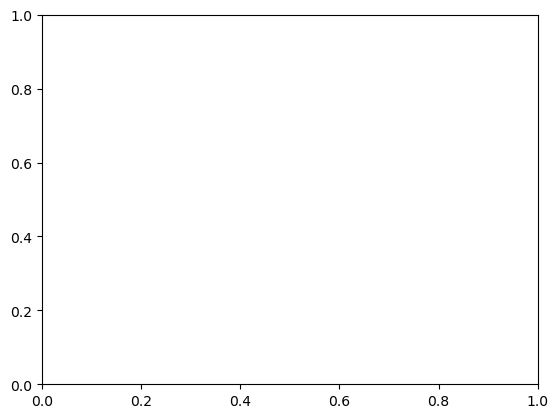

In [95]:
y_prob = list()
for N in range(51, 800):
    count = 0
    for l in range(1000):    
        dict_DNA = {1 : "A", 2 : "T", 3 : "G", 4 : "C"}
        rand_nums = np.random.randint(1, 5, size = N)
        rand_seq = ""
        for num in rand_nums:
            rand_seq = rand_seq + dict_DNA[num]

        orf = ""
        for i in range(len(rand_seq)):
            if rand_seq[i: i + 3] == "ATG":

                new_str = rand_seq[i :]

                if new_str.find("TAA") % 3 == 0:
                    index_TAA = new_str.find("TAA")
                else:
                    index_TAA = -1

                if new_str.find("TAG") % 3 == 0:
                    index_TAG = new_str.find("TAG")
                else:
                    index_TAG = -1

                if new_str.find("TGA") % 3 == 0:
                    index_TGA = new_str.find("TGA")
                else:
                    index_TGA = -1 

                index_list = np.array([index_TAA, index_TGA, index_TAG])
                index_list = index_list[index_list > 0]

                if len(index_list) > 0:
                    min_index = min(index_list)
                    new_orf = rand_seq[i: i + min_index + 3]
                    if len(orf) < len(new_orf):
                        orf = new_orf
                        
        if len(orf) > 50:
            count += 1
    prob = count/1000
    y_prob.append(prob)

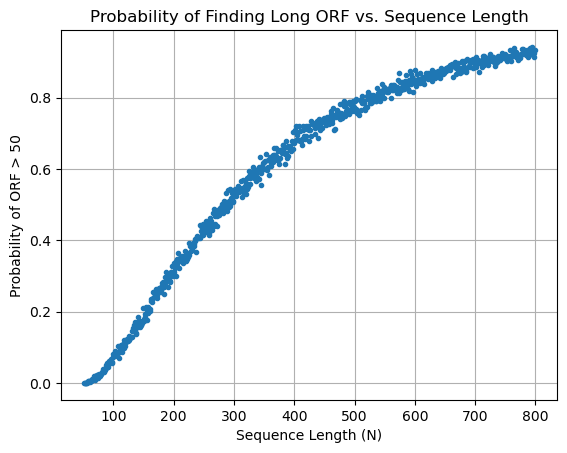

In [96]:
plt.plot(range(51, 800), y_prob, '.')
plt.xlabel("Sequence Length (N)")
plt.ylabel("Probability of ORF > 50")
plt.title("Probability of Finding Long ORF vs. Sequence Length")
plt.grid(True)
plt.show()

### Part 5: 
Make sure your results from part 4 are sensible. What features
must this curve have (hint: what should be the value when N is small or when
N is very large? how should the curve change in between?) Make sure your plot looks like this.

The code generates a plot that is sensible: a low probability when N is small, a higher probability when N is large, and a relatively logarithmic transition in between.  

### Part 6 \[required for 570 only\]
Write a solution for part 2 of this problem which is vectorized, that is, it does not require you to loop over sequences. Compare the time it takes to run the vectorized and non-vectorized code. Is one faster than the other? Are there other considerations when deciding which one to use? The [monotonic function](https://docs.python.org/3/library/time.html#time.monotonic) in the time module may be useful. 

# Problem 2 data input/output and simple analysis
The file qPCRdata.txt is an actual file that comes from a Roche
LightCycler qPCR machine. The important columns are the Cp which tells
you the cycle of amplification and the position which tells you the well
from the 96 well plate. Each column of the plate has a different gene and
each row has a different condition. Each gene in done in triplicates so
columns 1-3 are the same gene, columns 4-6 the same, etc.
so A1-A3 are gene 1 condition 1, B1-B3 gene 1 condition 2, A4-A6 gene 2
condition 1, B4-B6 gene2 condition 2 etc. 

### Part1: 
write code to read the Cp data from this file into a vector. You can ignore the rows with positions beginning with G and H as there were no samples here. 

In [63]:
qPCRdata = open("qPCRdata.txt","r")

lst = list()
for line in qPCRdata:
    data_array = np.array(line.split("\t"))[:7]
    lst.append(data_array)
    
lst1 = list()
for array in lst[1:]:
    if ("G" not in array[2]) & ( "H" not in array[2]):
        lst1.append(array)
arrayCp = list(np.vstack(lst1)[1:,4])
print(arrayCp)

['23.83', '23.80', '23.83', '21.67', '21.68', '21.65', '25.67', '25.63', '25.68', '20.52', '20.32', '20.34', '24.50', '24.53', '24.50', '21.28', '21.27', '21.27', '25.99', '26.01', '26.00', '20.97', '20.92', '20.98', '24.67', '24.62', '24.59', '19.47', '19.49', '19.45', '23.82', '23.81', '23.84', '20.58', '20.55', '20.53', '24.50', '24.46', '24.29', '19.19', '19.14', '19.13', '23.83', '23.84', '23.89', '20.77', '20.76', '20.76', '25.85', '25.77', '25.80', '19.65', '19.65', '19.64', '24.42', '24.31', '24.45', '20.43', '20.33', '20.32', '25.02', '25.02', '25.03', '19.05', '19.05', '19.05', '24.33', '24.33', '24.43', '20.82', '20.80', '20.79']


### Part 2: 
Transform this vector into an array representing the layout of the plate. e.g. a 6 row, 12 column array should that data(1,1) = Cp from A1, data(1,2) = Cp from A2, data(2,1) = Cp from B1 etc. 

In [8]:
lst2 = list()
for i in range(0, len(arrayCp), 12):
    lst2.append(np.array(arrayCp[i: i + 12]).astype("float"))
Cp_array = np.vstack(lst2)
print(Cp_array)

[[23.83 23.8  23.83 21.67 21.68 21.65 25.67 25.63 25.68 20.52 20.32 20.34]
 [24.5  24.53 24.5  21.28 21.27 21.27 25.99 26.01 26.   20.97 20.92 20.98]
 [24.67 24.62 24.59 19.47 19.49 19.45 23.82 23.81 23.84 20.58 20.55 20.53]
 [24.5  24.46 24.29 19.19 19.14 19.13 23.83 23.84 23.89 20.77 20.76 20.76]
 [25.85 25.77 25.8  19.65 19.65 19.64 24.42 24.31 24.45 20.43 20.33 20.32]
 [25.02 25.02 25.03 19.05 19.05 19.05 24.33 24.33 24.43 20.82 20.8  20.79]]


### Part 3. 
The 4th gene in columns 10 - 12 is known as a normalization gene. That is, it's expression should not change between conditions and it is used to normalize the expression values for the genes. For the other three genes, compute their normalized expression in all  conditions (using the normalization gene) and then further normalize this to condition 1. In other words, normalize to the normalization gene and compute the fold change between each conditions and condition 1. The formula for this is $2^{[Cp0 - CpX - (CpN0 - CpNX)]}$ where Cp0 is the Cp for the gene in the 1st condition, CpX is the value of Cp in condition X and CpN0 and CpNX are the same quantitites for the normalization gene. Plot this data in an appropriate way. 

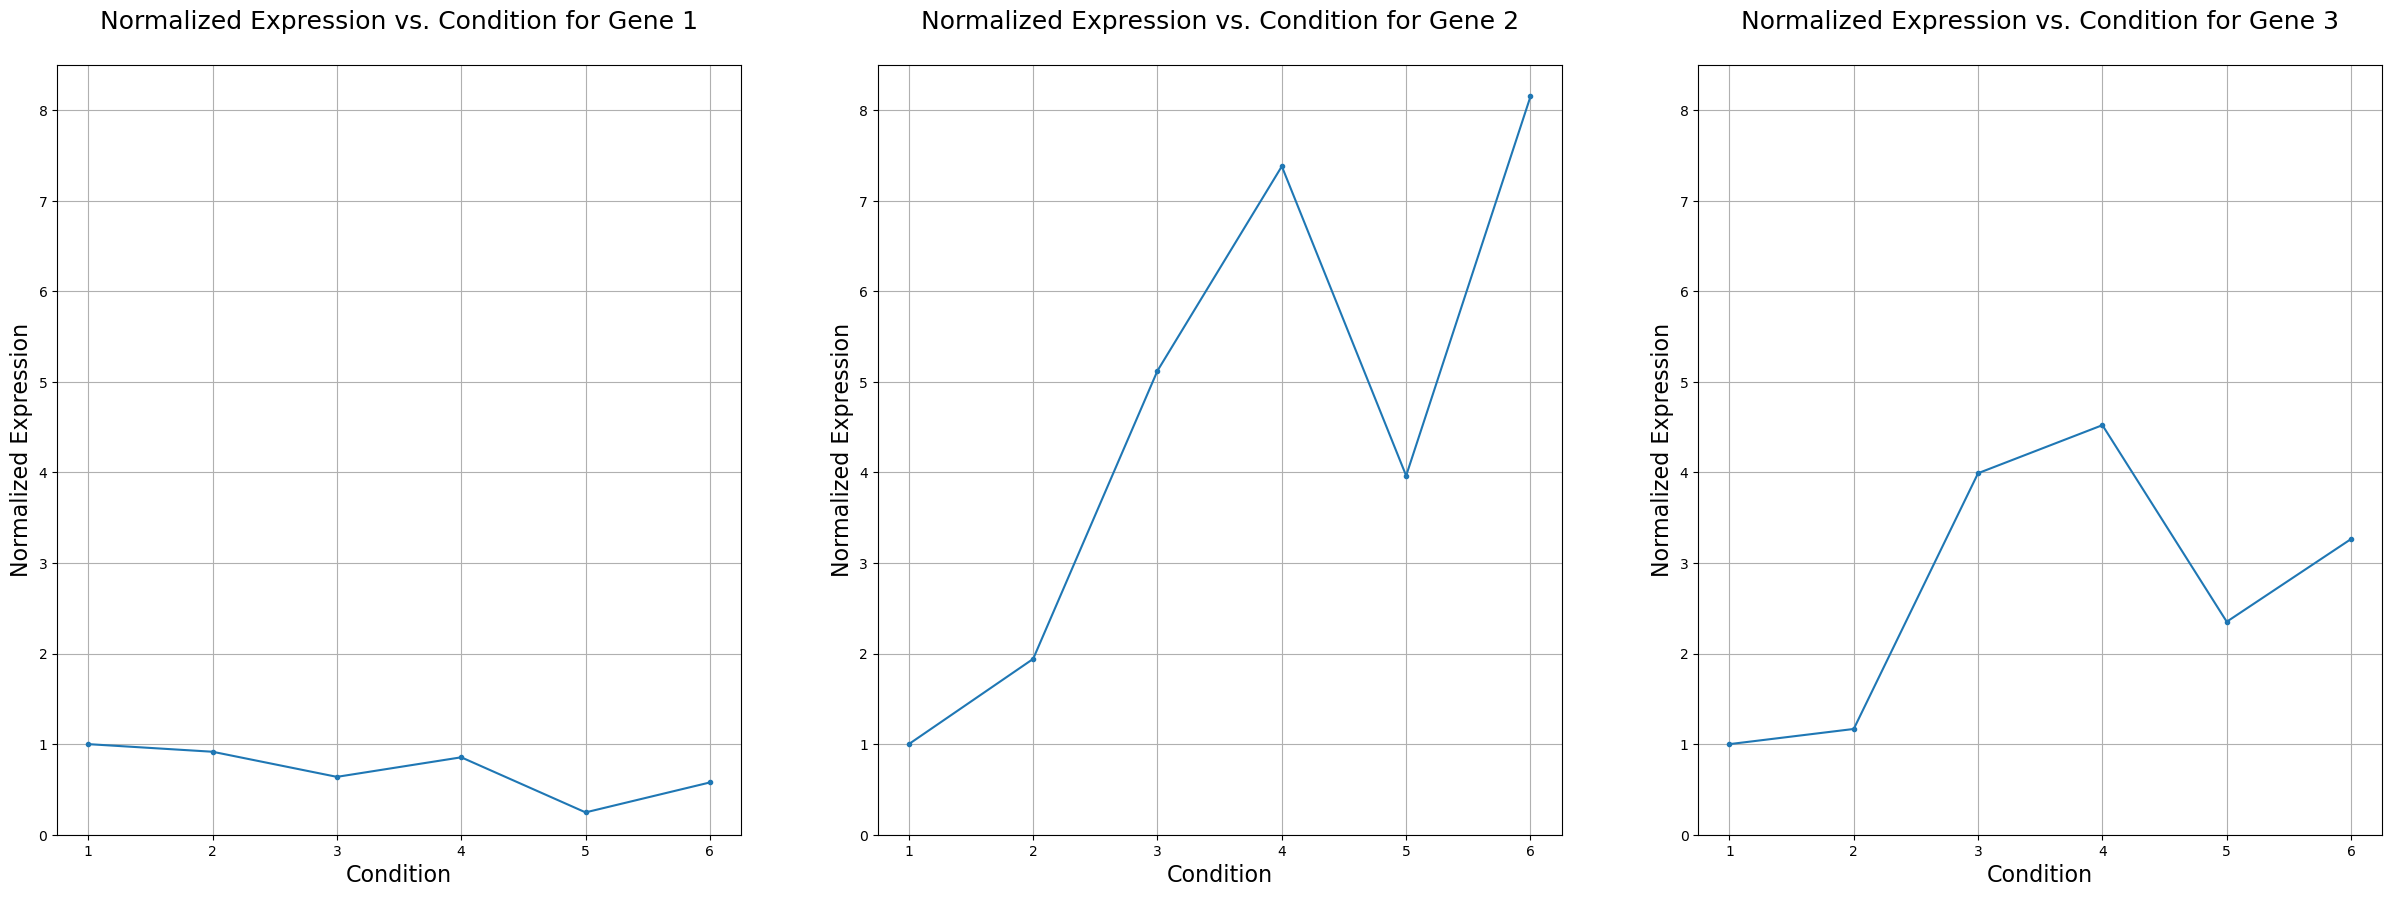

In [104]:
# Normalization Gene
geneN_array = Cp_array[:,9:12]
CpN0 = geneN_array[0, :].mean()
CpNX = list()
for row in gene4_array:
    CpNX.append(row.mean())
CpNX = np.array(CpNX)

# Gene 1
gene1_array = Cp_array[:,:3]
Cp10 = gene1_array[0, :].mean()
Cp1X = list()
for row in gene1_array:
    Cp1X.append(row.mean())
Cp1X = np.array(Cp1X)
normalization1 = np.power(2, Cp10-Cp1X-(CpN0-CpNX))

# Gene 2
gene2_array = Cp_array[:,3:6]
Cp20 = gene2_array[0, :].mean()
Cp2X = list()
for row in gene2_array:
    Cp2X.append(row.mean())
Cp2X = np.array(Cp2X)
normalization2 = np.power(2, Cp20-Cp2X-(CpN0-CpNX))

# Gene 3
gene3_array = Cp_array[:,6:9]
Cp30 = gene3_array[0, :].mean()
Cp3X = list()
for row in gene3_array:
    Cp3X.append(row.mean())
Cp3X = np.array(Cp3X)
normalization3 = np.power(2, Cp30-Cp3X-(CpN0-CpNX))

## Plots
x = range(1,7)
plt.figure(figsize=(30,10))

# Gene 1 Plot
plt.subplot(1,3,1) # one by three
plt.plot(x,normalization1,'.-')
plt.xlabel("Condition", fontsize=16)
plt.ylabel("Normalized Expression", fontsize=16)
plt.title("Normalized Expression vs. Condition for Gene 1\n", fontsize=18)
plt.ylim(0,8.5)
plt.grid(True)

# Gene 2 Plot
plt.subplot(1,3,2)
plt.plot(x,normalization2,'.-')
plt.xlabel("Condition", fontsize=16)
plt.ylabel("Normalized Expression", fontsize=16)
plt.title("Normalized Expression vs. Condition for Gene 2\n", fontsize=18)
plt.ylim(0,8.5)
plt.grid(True)

# Gene 3 Plot
plt.subplot(1,3,3)
plt.plot(x,normalization3,'.-')
plt.xlabel("Condition", fontsize=16)
plt.ylabel("Normalized Expression", fontsize=16)
plt.title("Normalized Expression vs. Condition for Gene 3\n", fontsize=18)
plt.ylim(0,8.5)
plt.grid(True)

plt.show()

### Part 4 [Only required for 570]
 Assume that the error in each Cp is the standard deviation of the three measurements. Add a section to your code that propogates this uncertainty to the final results. Add error bars to your plot. (on propagation of error, see, for example: [wikipedia link](https://en.wikipedia.org/wiki/Propagation_of_uncertainty)